In [1]:
#dependancies
import pandas as pd
import scipy
import matplotlib.pyplot as plt

In [2]:
#import the data from the csv  
file = '../Resources/Movie-data/Attributes_DataFrame.csv'

Movie_atributes = pd.read_csv(file)

Movie_atributes.head(5)

,Title,Domestic,International,Budget,Distributor,MPAA-Rating,Runtime,Genres
0,Jurassic World (2015),652270625,1018130012,150000000.0,Universal Pictures,PG-13,124,Action;Adventure;Sci-Fi
1,Star Wars: Episode VII - The Force Awakens (2015),936662225,1131561399,245000000.0,Walt Disney Studios Motion Pictures,PG-13,138,Action;Adventure;Sci-Fi
2,Avengers: Age of Ultron (2015),459005868,943800000,250000000.0,Walt Disney Studios Motion Pictures,PG-13,141,Action;Adventure;Sci-Fi
3,Inside Out (2015),356461711,501149463,175000000.0,Walt Disney Studios Motion Pictures,PG,95,Adventure;Animation;Comedy;Drama;Family;Fantasy
4,Furious 7 (2015),353007020,1162040651,190000000.0,Universal Pictures,PG-13,137,Action;Adventure;Thriller


In [3]:
#get the release year via splitting the title between '(' and ')'
Movie_atributes['Genre List'] = Movie_atributes['Genres'].str.split(';')


Movie_atributes

,Title,Domestic,International,Budget,Distributor,MPAA-Rating,Runtime,Genres,Genre List
0,Jurassic World (2015),652270625,1018130012,150000000.0,Universal Pictures,PG-13,124,Action;Adventure;Sci-Fi,"[Action, Adventure, Sci-Fi]"
1,Star Wars: Episode VII - The Force Awakens (2015),936662225,1131561399,245000000.0,Walt Disney Studios Motion Pictures,PG-13,138,Action;Adventure;Sci-Fi,"[Action, Adventure, Sci-Fi]"
2,Avengers: Age of Ultron (2015),459005868,943800000,250000000.0,Walt Disney Studios Motion Pictures,PG-13,141,Action;Adventure;Sci-Fi,"[Action, Adventure, Sci-Fi]"
3,Inside Out (2015),356461711,501149463,175000000.0,Walt Disney Studios Motion Pictures,PG,95,Adventure;Animation;Comedy;Drama;Family;Fantasy,"[Adventure, Animation, Comedy, Drama, Family, ..."
4,Furious 7 (2015),353007020,1162040651,190000000.0,Universal Pictures,PG-13,137,Action;Adventure;Thriller,"[Action, Adventure, Thriller]"
...,...,...,...,...,...,...,...,...,...
3395,The Wolf of Snow Hollow (2020),185026,81937,NaN,United Artists Releasing,R,83,Comedy;Horror;Thriller,"[Comedy, Horror, Thriller]"
3396,Come Away (2020),184477,1480982,NaN,Relativity Media,PG,94,Adventure;Drama;Fantasy,"[Adventure, Drama, Fantasy]"
3397,No Escape (2020),167962,4135870,NaN,Vertical Entertainment,R,91,Adventure;Horror;Mystery;Thriller,"[Adventure, Horror, Mystery, Thriller]"
3398,A Call to Spy (2020),159014,681026,NaN,IFC Films,PG-13,123,Biography;Crime;Drama;Thriller;War,"[Biography, Crime, Drama, Thriller, War]"


In [13]:

allGenres = []

Movie_atributes = Movie_atributes.dropna(how='any')
Movie_atributes = Movie_atributes.reset_index()


for genres in range(len(Movie_atributes['Genre List'])):
    for genre in list(Movie_atributes['Genre List'][genres]):
        if genre not in allGenres:
            allGenres.append(genre)


allGenres


['Action',
 'Adventure',
 'Sci-Fi',
 'Animation',
 'Comedy',
 'Drama',
 'Family',
 'Fantasy',
 'Thriller',
 'Biography',
 'War',
 'Romance',
 'Horror',
 'Mystery',
 'Crime',
 'History',
 'Musical',
 'Music',
 'Sport',
 'Western',
 'Documentary']

In [18]:
genre_info = {}
budgets = []
earningss = []


for genre in allGenres:
    budget=0
    earnings =0
    count=0
    for movie in range(len(Movie_atributes)):
        if genre in Movie_atributes.loc[movie,'Genre List']:
            budget += Movie_atributes.loc[movie,'Budget']
            earnings += Movie_atributes.loc[movie,'Domestic'] + Movie_atributes.loc[movie,'International']
            count+=1
    budgets.append(budget/count)
    earningss.append(earnings/count)


    


genre_info['Earnings'] = earningss
genre_info['Budget'] = budgets
genre_info['Genre']=allGenres

genre_info_df = pd.DataFrame(genre_info)

genre_info_df   
    

,Earnings,Budget,Genre
0,2.492973e+08,8.393570e+07,Action
1,3.297077e+08,9.964046e+07,Adventure
2,3.030214e+08,9.499755e+07,Sci-Fi
3,3.079354e+08,8.647139e+07,Animation
4,1.440552e+08,4.722376e+07,Comedy
5,1.183057e+08,4.074265e+07,Drama
6,2.499277e+08,7.745712e+07,Family
7,2.811367e+08,8.727997e+07,Fantasy
8,1.486952e+08,4.999519e+07,Thriller
9,1.002573e+08,3.548077e+07,Biography


<AxesSubplot:xlabel='Genre'>

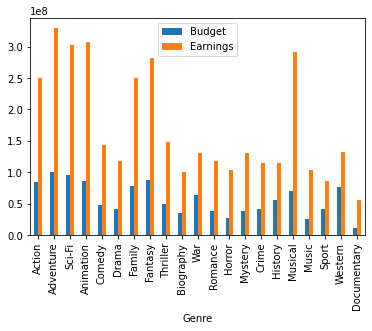

In [21]:
genre_info_df.plot(kind = 'bar', x='Genre',y=['Budget','Earnings'])